In [12]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import pandas_datareader as web

In [13]:
starting = dt.datetime(2012,1,1)#Start date
end1 = dt.datetime(2021,4,27)   #End code

df = web.DataReader('NFLX', data_source='yahoo',start = starting,end = end1) 
df.tail(10)
#  Companies for Test 
#  "FB"  Facebook, "TSLA" - Tesla, "AMZN"- Amazon , "BTC-USD" - Bitcoin, "AAPL"- Apple


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-04-14,554.869995,538.530029,554.869995,540.020020,3740300.0,540.020020
2021-04-15,553.489990,542.659973,544.169983,549.219971,3139100.0,549.219971
2021-04-16,551.979980,539.510010,550.539978,546.539978,3206000.0,546.539978
2021-04-19,556.440002,545.530029,546.900024,554.440002,4288700.0,554.440002
2021-04-20,563.559998,546.299988,554.419983,549.570007,11257600.0,549.570007
2021-04-21,515.460022,503.600006,508.000000,508.899994,22897400.0,508.899994
2021-04-22,513.960022,500.549988,513.820007,508.779999,9061100.0,508.779999
2021-04-23,509.700012,500.700012,509.010010,505.549988,7307700.0,505.549988
2021-04-26,510.480011,503.000000,506.760010,510.299988,4381900.0,510.299988


In [14]:
df.reset_index(inplace=True) 

In [15]:
corr = df.corr(method='pearson') 
corr

,High,Low,Open,Close,Volume,Adj Close
High,1.000000,0.999687,0.999759,0.999761,-0.450292,0.999761
Low,0.999687,1.000000,0.999749,0.999749,-0.455417,0.999749
Open,0.999759,0.999749,1.000000,0.999464,-0.452882,0.999464
Close,0.999761,0.999749,0.999464,1.000000,-0.452553,1.000000
Volume,-0.450292,-0.455417,-0.452882,-0.452553,1.000000,-0.452553
Adj Close,0.999761,0.999749,0.999464,1.000000,-0.452553,1.000000


<AxesSubplot:>

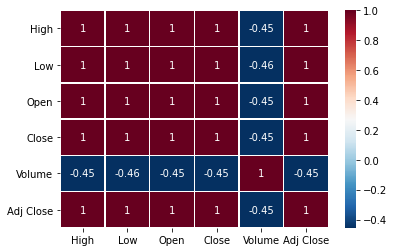

In [16]:
import seaborn as sb
sb.heatmap(corr,xticklabels=corr.columns, yticklabels=corr.columns,
 cmap='RdBu_r', annot=True, linewidth=0.5)

In [17]:
#prepare dataset to work with 
nflx_df=df[['Date','High','Open','Low','Close']]
nflx_df.head(10)

,Date,High,Open,Low,Close
0,2012-01-03,10.388571,10.040000,10.018571,10.320000
1,2012-01-04,11.567143,10.335714,10.258571,11.492857
2,2012-01-05,11.694286,11.345714,11.040000,11.328571
3,2012-01-06,12.471429,11.302857,11.242857,12.327143
4,2012-01-09,14.235714,12.801429,12.448571,14.025714
5,2012-01-10,14.262857,14.257143,13.214286,13.690000
6,2012-01-11,13.657143,13.570000,13.064286,13.164286
7,2012-01-12,13.338571,13.211429,12.742857,13.164286
8,2012-01-13,13.792857,13.067143,12.885714,13.482857
9,2012-01-17,13.978571,13.714286,13.475714,13.531429


In [18]:
nflx_df['Year']=df['Date'].dt.year   
nflx_df['Month']=df['Date'].dt.month
nflx_df['Day']=df['Date'].dt.day

<ipython-input-18-4b43e4e1c4dc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nflx_df['Year']=df['Date'].dt.year


In [19]:
nfx_df=nflx_df[['Day','Month','Year','High','Open','Low','Close']]
nfx_df.head(10)

,Day,Month,Year,High,Open,Low,Close
0,3,1,2012,10.388571,10.040000,10.018571,10.320000
1,4,1,2012,11.567143,10.335714,10.258571,11.492857
2,5,1,2012,11.694286,11.345714,11.040000,11.328571
3,6,1,2012,12.471429,11.302857,11.242857,12.327143
4,9,1,2012,14.235714,12.801429,12.448571,14.025714
5,10,1,2012,14.262857,14.257143,13.214286,13.690000
6,11,1,2012,13.657143,13.570000,13.064286,13.164286
7,12,1,2012,13.338571,13.211429,12.742857,13.164286
8,13,1,2012,13.792857,13.067143,12.885714,13.482857
9,17,1,2012,13.978571,13.714286,13.475714,13.531429


In [20]:
#separate Independent and dependent variable
X = nfx_df.iloc[:,nfx_df.columns !='Close']
Y= nfx_df.iloc[:, 5]

In [21]:
print(X.shape) 
print(Y.shape) 

(2344, 6)
(2344,)


In [22]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(X,Y,test_size=.25)

In [23]:
print(x_train.shape) 
print(x_test.shape) 
print(y_train.shape) 
print(y_test.shape) 
#y_test to be evaluated with y_pred for Diff models

(1758, 6)
(586, 6)
(1758,)
(586,)


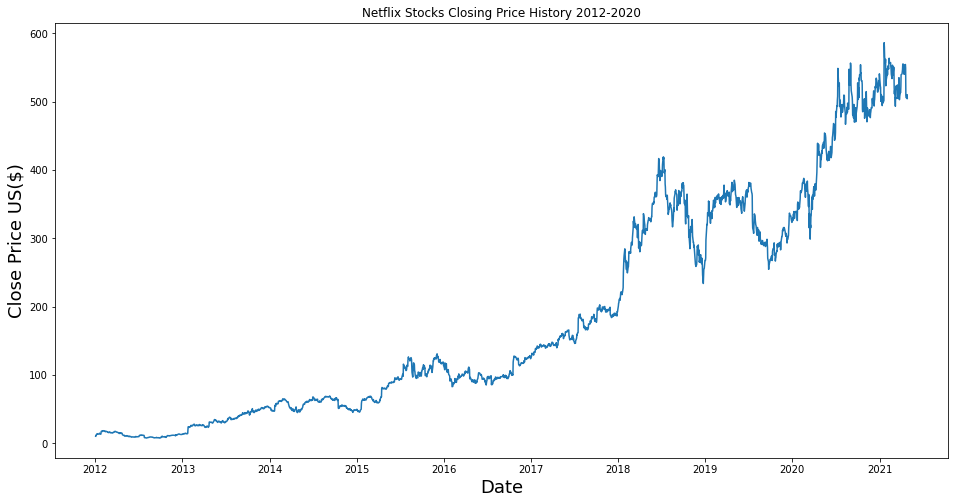

In [24]:
plt.figure(figsize=(16,8))
plt.title('Netflix Stocks Closing Price History 2012-2020')
plt.plot(nflx_df['Date'],nflx_df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price US($)',fontsize=18)
plt.style.use('fivethirtyeight')
plt.show()

In [25]:
lr_model=LinearRegression()
lr_model.fit(x_train,y_train)

LinearRegression()

In [30]:
y_pred=lr_model.predict(x_test)
predict=np.mean(y_pred)
predict

176.7694017171046

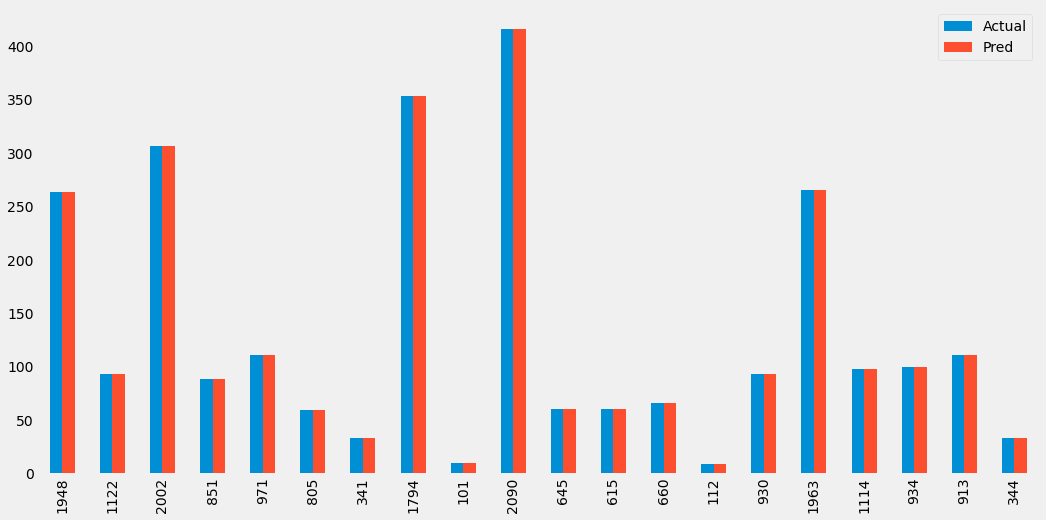

In [33]:
plot_df=pd.DataFrame({'Actual':y_test,'Pred':y_pred})
plot_df.head(20).plot(kind='bar',figsize=(16,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [38]:
from sklearn.neighbors import KNeighborsRegressor
knn_regressor=KNeighborsRegressor(n_neighbors = 5)
knn_model=knn_regressor.fit(x_train,y_train)
y_knn_pred=knn_model.predict(x_test)
knn_predict=np.mean(y_knn_pred)
knn_predict

177.0961813832306

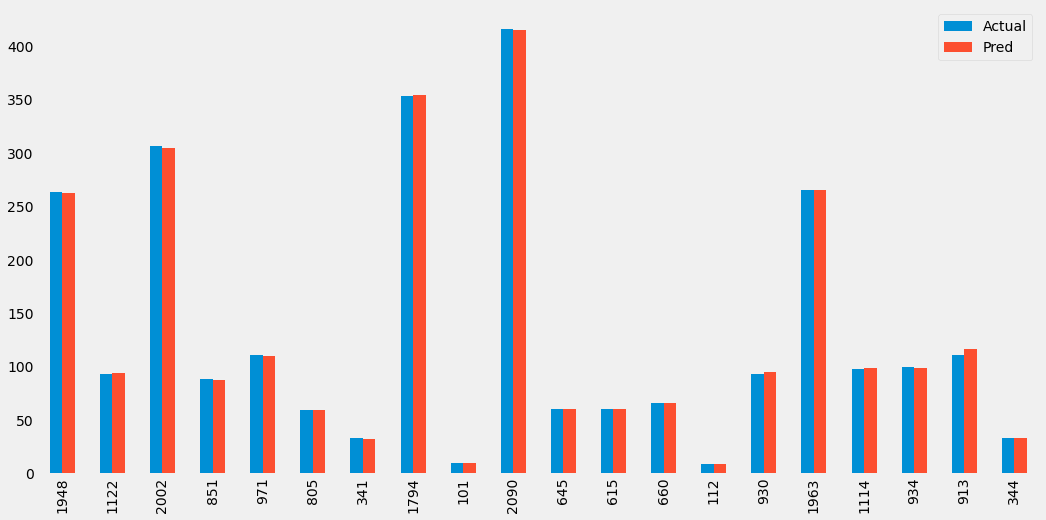

In [40]:
plot_knn_df=pd.DataFrame({'Actual':y_test,'Pred':y_knn_pred})
plot_knn_df.head(20).plot(kind='bar',figsize=(16,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [43]:
from sklearn.svm import SVR
svm_regressor = SVR(kernel='linear')
svm_model=svm_regressor.fit(x_train,y_train)
y_svm_pred=svm_model.predict(x_test)
svm_pred=np.mean(y_svm_pred)
svm_pred

176.78653055681696

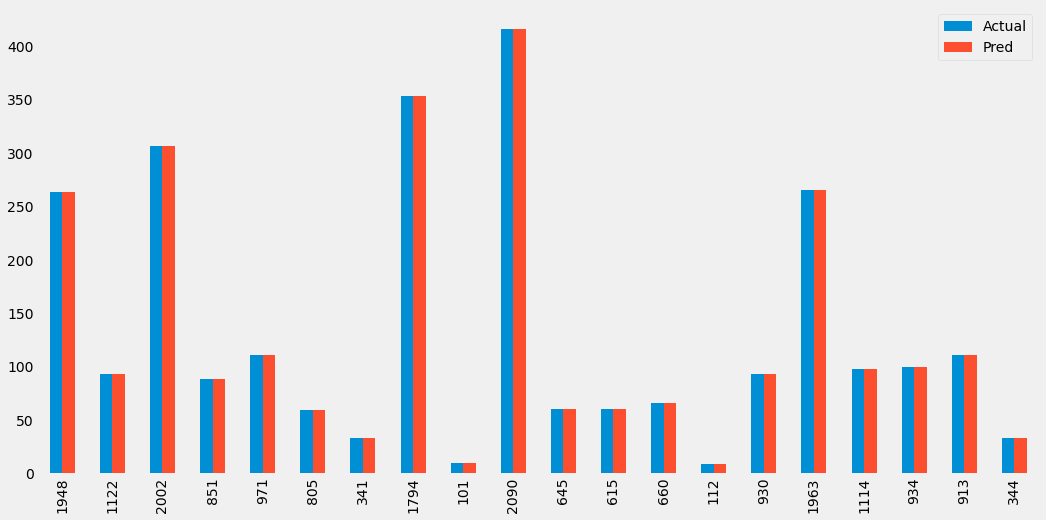

In [44]:
plot_svm_df=pd.DataFrame({'Actual':y_test,'Pred':y_svm_pred})
plot_svm_df.head(20).plot(kind='bar',figsize=(16,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [45]:
from sklearn.metrics import mean_squared_error , r2_score
import math

In [46]:
lr_mse=math.sqrt(mean_squared_error(y_test,y_pred))
print('Linear Model Root mean square error',lr_mse)

Linear Model Root mean square error 3.254120455458835e-14


In [48]:
knn_mse=math.sqrt(mean_squared_error(y_test,y_knn_pred))
print('KNN Model Root mean square error',knn_mse)

KNN Model Root mean square error 1.9331269736933099


In [49]:
svm_mse=math.sqrt(mean_squared_error(y_test,y_svm_pred))
print('SVM Model Root mean square error SVM',svm_mse)

SVM Model Root mean square error SVM 0.037609492839933915


In [50]:
print('Linear R2: ', r2_score(y_test, y_pred))
print('KNN R2: ', r2_score(y_test, y_knn_pred))
print('SVM R2: ', r2_score(y_test, y_svm_pred))

Linear R2:  1.0
KNN R2:  0.9998414045232384
SVM R2:  0.9999999399704635


In [52]:
%matplotlib inline
import matplotlib
import seaborn as sns
sns.set()
matplotlib.rcParams['figure.dpi'] = 144
import numpy as np
import matplotlib.pyplot as plt
import graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree  
from sklearn.preprocessing import MinMaxScaler

In [55]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

clf = DecisionTreeClassifier(max_depth=3,)
clf.fit(X, Y)

tree.plot_tree(clf,
               feature_names = X.columns,
               class_names=["High", "Low"],
               filled = True);
            

ValueError: Unknown label type: 'continuous'